# Result
Created by Wenhan Hua

## Week6 19th. - 26th. Feb

When we multiply the spectrum together, we get:

[Multiply+BlueSideband+without-force-damping](./Output_Figures/Multi-BlueSideband.png)

[Multiply+RedSideband+without-force-damping](./Output_Figures/Multi-RedSideband.png)

[Multiply+Secular+without-force-damping](./Output_Figures/Multi-Secular.png)

With spectrum multiplying, we observe:

1. Quick cooling in secular-frequency resonator(Since withour force damping, the energy will increase later), Slow cooling in blue sideband frequency resonator, heating in red sideband frequency resonator.


When we convolve the spectrum, we get:

[Convolution+BlueSideband+without-force-damping](./Output_Figures/Conv-BlueSideband.png)

[Convolution+RedSideband+without-force-damping](./Output_Figures/Conv-RedSideband.png)

[Convolution+Secular+without-force-damping](./Output_Figures/Conv-Secular.png)

With spectrum convolution, we observe:

1. Very quick cooling in secular-frequency resonator(Since withour force damping, the energy will increase later), cooling in blue sideband frequency resonator, heating in red sideband frequency resonator.


Then we add Force damping in both cases, when we just calculate the Damping factor in one micromotion period, the result is 

[DampingFactor,CaledinoneMMperiod](./Output_Figures/DampingFactor-1.png)

Damping factor calculated in five micromotion period:

[DampingFactor,CaledinfiveMMperiod](./Output_Figures/Dampingfactor-2.png)

[DampingFactor2](./Output_Figures/Dampingfactor-plot-2.png)

Damping factor calculated in 10 micromotion period:

[DampingFactor,CaledintenMMperiod](./Output_Figures/Dampingfactor-4.png)

[DampingFactor4](./Output_Figures/Dampingfactor-plot-4.png)

Damping factor calculated in real-time velocity:

[DampingFactor,Caledinrealvelocity](./Output_Figures/Dampingfactor-3.png)

[DampingFactor3](./Output_Figures/Dampingfactor-plot-3.png)

Damping factor calculated by initial velocity maximum and 20 secular peroid:

[Damping factor, calculated by initial velocity maximum and 20 secular peroids](./Output_Figures/Dampingfactor-7.png)

[Damping factor](./Output_Figures/Dampingfactor-plot-7.png)

[Energy](./Output_Figures/Energy-7.png)




## Draft

Then Johnson-Nyquist noise is added in the motional simulation, https://en.wikipedia.org/wiki/Johnson%E2%80%93Nyquist_noise

For a given bandwidth, the root mean square (RMS) of the voltage, $v_{n}$, is given by
$$v_{n}={\sqrt {\overline {v_{n}^{2}}}}{\sqrt {\Delta f}}={\sqrt {4k_{\text{B}}TR\Delta f}}$$

which means we can generate the noise distribution with a gaussion distri, where the RMS is given by $ {\sqrt {4k_{\text{B}}TR\Delta f}}$, and $\Delta f$ is given by $f_{res} / Q$ according to one of the definitions of quality factor Q, https://en.wikipedia.org/wiki/Q_factor

concerning how to add noise to a signal in Python, there is an answer says: https://stackoverflow.com/questions/14058340/adding-noise-to-a-signal-in-python

Two kinds of noise creation was recommended:
1. Markovian Noise
2. Non-Markovian Noise with correlation time $T_{corr} = 1 / f_{res}$; 

There is a website that supports the Non-Markovian Noise, https://www.frontiersin.org/research-topics/41181/the-role-of-non-markovian-noise-in-quantum-information-processing-tasks

(No-access)White, G. Characterization and control of non-Markovian quantum noise. Nat Rev Phys 4, 287 (2022). https://doi.org/10.1038/s42254-022-00446-2

Chang Woo Kim, et. al Analog Quantum Simulation of the Dynamics of Open Quantum Systems with Quantum Dots and Microelectronic Circuits https://journals.aps.org/prxquantum/pdf/10.1103/PRXQuantum.3.040308

Test

Secular energy calculations / could also use the average energy over a period of secular motion for now

In [ ]:
import numpy as np

# Define the pesudo-potential

def Vps(Vec, t):
    x, y, z, vx, vy, vz = Vec
    Ex, Ey, Ez = Erf(Vec, t)
    return q ** 2 / 4 / m / wrf ** 2 * (Ex ** 2 + Ey ** 2 + Ez ** 2)

# Calculte for the kinetic energy

def Ekin(Vec, t):
    x, y, z, vx, vy, vz = Vec
    return 0.5 * m * (vx ** 2 + vy ** 2 + vz ** 2)

E_sec = []
for i in range(N - Nsec):
    E_sec_temp = 0
    for j in range(Nsec):
        Vec = x_damp[i + j], y_damp[i + j], z_damp[i + j]
        E_sec_temp = E_sec_temp + Vdc(Vec, t_eval[i + j]) + Vrf(Vec, t_eval[i + j]) + Ekin(Vec, t_eval[i + j])
    E_sec.append(E_sec_temp / Nsec)

# plot the secular energy
# Plot the x-axis motion
fig1, ax = plt.subplots(1,2)

# Plot the data on the axes
ax[0].plot(t_damp[: N- Nsec]*1e6, )

# Add labels to the axes
ax[0].set_xlabel('t(\mu s)')
ax[0].set_ylabel('x(t)')

# Plot the data on the axes
Zoomnum = int(0.6e-8/dt)
ax[1].plot(t_damp[:Zoomnum]*1e6, x_damp[:Zoomnum])

# Add labels to the axes
ax[1].set_xlabel('t(\mu s)')
ax[1].set_ylabel('x(t)')

# Show the plot
plt.show()

Code for calculating secluar energy, following the article for rf-heating.(unfinished)

Calculate the kinetic energy of the particle, method is mainly based on
[rf-induced heating dynamics of noncrystallized trapped ions](./vHGWBSM.pdf)

The Method is following the Section. III. Full Ion Dynamics Simulation

Code is here(By Matlab): https://zenodo.org/record/5884496#.Y-6NGuyZP2d

The total energy $E_{tot}$ is given by:

$$ E_{tot} = \sum_i [V_{DC}(\vec{r_i}) + V_{rf}(\vec{r_i},t) + V_{kin}(v_i) + \frac{1}{2}\sum_{j\not = i} V_{Coul} (\vec{r_i},\vec{r_j})], $$

and Note the energies corresponding to two timescales:

$$ E_{tot} = E_{rf} + E_{sec} $$

for ions, we calculate the total energy by:

- $V_{kin} = (1/2) m_i v_i^2 $
- $V_{Coul} = \frac{1}{4\pi \epsilon_0} \frac{q_i q_j}{|r_i - r_j|}$

To get the secluar energy, we do the follows:

- replace $V_{rf}$ with pseudopotential(effective static potential)
$$ V_{ps} = \frac{q^2}{4m_i \Omega_{rf}^2} |\nabla V_{rf}(r_i)|^2 $$

- replace $ r_i $ and $v_i$ with secular components, $ r_i^{sec}$ and $v_i^{sec} $

If $\omega_{secular} = \omega_{radical} << \Omega_{rf}$, then

(???)
$$ \frac{d^2 r_i^{(rf)}}{dt^2} \approx - \frac{q \nabla V_{rf}(r_{sec})}{m} \cos(\Omega_{rf}t). $$

If $r_i^{rf}$ is small enough that $\nabla V_{rf}(r_i^{sec})$ is approximately constant, $\nabla V_{rf}(r_i^{sec})$ is approximataly constant, $r^{sec} \approx r^0$, then:

$$ r^{rf} \approx - \frac{q\nabla V_{rf}(r^0)}{m \Omega_{rf}^2}\cos(\Omega_{rf}t). $$

The secular motion is iteratively approximated by

$$ r_i^1 = r_i^0 - r_i^{rf} = r_i^0 + \frac{q \nabla V_{rf}(r_i^0)}{m\Omega_{rf}^2}\cos(\Omega_{rf}t).$$

then:

$$ r_i^{n+1} = r_i + \frac{q\nabla V_{rf}(r_i^n)}{m\Omega_{rf}^2}\cos(\Omega_{rf}t).$$


I will use this interative equation to get $r^n \approx r^{sec}$, then using $ v = dr/dt $ to get velocityies and pesudopotential approximation $V_{ps}$

Then the secular energy:

$$ E_{sec} = V_{dc}(r^n) + V_{ps}(r^n) + E_{kin}(v^n) + \frac{1}{2} \sum_{j\not = i} V_{Coul}(r^n, r^n) $$

In [ ]:
# Define the pesudo-potential

def Vps(Vec, t):
    x, y, z, vx, vy, vz = Vec
    Ex, Ey, Ez = Erf(Vec, t)
    return q ** 2 / 4 / m / wrf ** 2 * (Ex ** 2 + Ey ** 2 + Ez ** 2)

# Initialization for secular position

x_final = x_damp
y_final = y_damp
z_final = z_damp

x_sec = x_final.copy()
y_sec = y_final.copy()
z_sec = z_final.copy()

vx_sec = [vx0] + np.gradient(x_final) / dt
vy_sec = [vy0] + np.gradient(y_final) / dt 
vz_sec = [vz0] + np.gradient(z_final) / dt

# Do the iteration
for step in range(iteration_steps):
    for i in range(len(t_eval)):
        Vec = x_sec[i], y_sec[i], z_sec[i], vx_sec[i], vy_sec[i], vz_sec[i]
        Ex, Ey, Ez = Erf(Vec, t_eval[i])
        x_sec = x_final + q * Ex / m / wrf ** 2 * np.cos(wrf * t_eval[i])
        y_sec = y_final + q * Ex / m / wrf ** 2 * np.cos(wrf * t_eval[i])
        z_sec = z_final + q * Ex / m / wrf ** 2 * np.cos(wrf * t_eval[i])

vx_sec = [vx0] + np.gradient(x_sec) / dt
vy_sec = [vy0] + np.gradient(y_sec) / dt
vz_sec = [vz0] + np.gradient(z_sec) / dt

E_sec = np.zeros(len(t_eval))

for i in range(len(t_eval)):
    Vec = x_sec[i], y_sec[i], z_sec[i], vx_sec[i], vy_sec[i], vz_sec[i]
    t = t_eval[i]
    E_sec[i] = Vdc(Vec, t) + Vps(Vec, t) \
        + 0.5 * m * (vx_sec[i] ** 2 + vy_sec[i] ** 2 + vz_sec[i] ** 2)
        
# Plot the E_sec t

plt.plot(t_eval*1e6, E_sec)

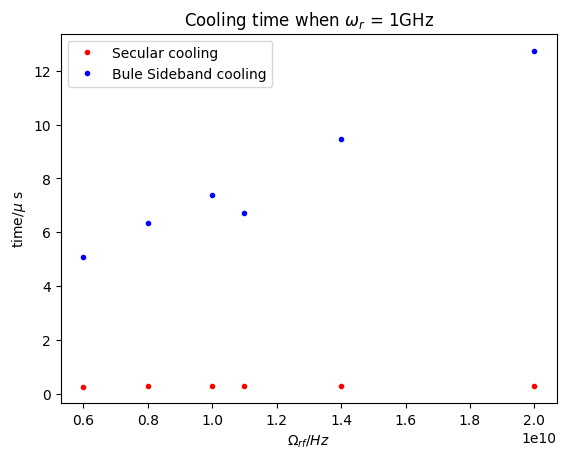

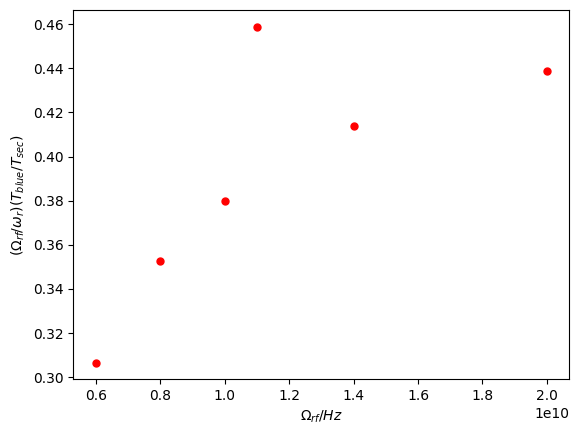

In [13]:
import numpy as np
import matplotlib.pylab as plt

w_rf = np.array([10e9, 14e9, 8e9, 11e9, 20e9, 6e9])
w_radical = np.array([1e9, 1e9, 1e9, 1e9, 1e9, 1e9])
time_sec = np.array([0.28, 0.28, 0.28, 0.28, 0.28, 0.26])
time_blue = np.array([7.37, 9.47, 6.35, 6.71, 12.76, 5.09])

plt.plot(w_rf, time_sec, 'r.', label = 'Secular cooling')
plt.plot(w_rf, time_blue, 'b.', label = 'Bule Sideband cooling')
plt.legend()
plt.ylabel('time/$\mu$ s')
plt.xlabel('$\Omega_{rf}/Hz$')
plt.title('Cooling time when $\omega_r$ = {}GHz'.format(1))
plt.show()

ratio = (w_rf / w_radical) / (time_blue / time_sec)
plt.ylabel('($\Omega_{rf}$/$\omega_r$)($T_{blue}$/$T_{sec}$) ')
plt.xlabel('$\Omega_{rf}/Hz$')
plt.plot(w_rf, ratio, 'r.', markersize = 10)
plt.show()

In [2]:
import numpy as np

f = open('Code/Results/Results_Blue_20_micro_keep_Wrf.csv', 'r')
# read each line, split the data wherever there's a blank space,
# and convert the values to floats

# lists where we will store the values we read in
Blue_20_keep_wrf = []
A_temp = []
for line in f:
    tokens = line.split(',')
    #print(len(tokens))
    for item in tokens:
        A_temp.append(float(eval(item)))
    Blue_20_keep_wrf.append(A_temp)
f.close()

Blue_20_keep_wrf = np.array(Blue_20_keep_wrf[0])

Blue_20_keep_wrf_wrf = Blue_20_keep_wrf[:len(Blue_20_keep_wrf)//3]
Blue_20_keep_wrf_time = Blue_20_keep_wrf[len(Blue_20_keep_wrf)//3:len(Blue_20_keep_wrf)//3 * 2]


f = open('Code/Results/Results_Blue_20_micro_keep_Wradial.csv', 'r')
# read each line, split the data wherever there's a blank space,
# and convert the values to floats

# lists where we will store the values we read in
Blue_20_keep_wradial = []
A_temp = []
for line in f:
    tokens = line.split(',')
    print(len(tokens))
    for item in tokens:
        A_temp.append(float(eval(item)))
    Blue_20_keep_wradial.append(A_temp)
f.close()

Blue_20_keep_wradial = np.array(Blue_20_keep_wradial[0])

Blue_20_keep_wradial_wradial = Blue_20_keep_wradial[:len(Blue_20_keep_wrf)//3]
Blue_20_keep_wradial_time = Blue_20_keep_wradial[len(Blue_20_keep_wrf)//3:len(Blue_20_keep_wrf)//3  * 2]


f = open('Code/Results/Results_Secular_10_micro_keep_Wradial.csv', 'r')
# read each line, split the data wherever there's a blank space,
# and convert the values to floats

# lists where we will store the values we read in
Secular_10_keep_wradial = []
A_temp = []
for line in f:
    tokens = line.split(',')
    print(len(tokens))
    for item in tokens:
        A_temp.append(float(eval(item)))
    Secular_10_keep_wradial.append(A_temp)
f.close()

Secular_10_keep_wradial = np.array(Secular_10_keep_wradial[0])

Secular_10_keep_wradial_wradial = Secular_10_keep_wradial[:len(Secular_10_keep_wradial)//2]
Secular_10_keep_wradial_time = Secular_10_keep_wradial[len(Secular_10_keep_wradial)//2:]


f = open('Code/Results/Results_Secular_20_micro_keep_Wrf.csv', 'r')
# read each line, split the data wherever there's a blank space,
# and convert the values to floats

# lists where we will store the values we read in
Secular_20_keep_wrf = []
A_temp = []
for line in f:
    tokens = line.split(',')
    print(len(tokens))
    for item in tokens:
        A_temp.append(float(eval(item)))
    Secular_20_keep_wrf.append(A_temp)
f.close()


Secular_20_keep_wrf= np.array(Secular_20_keep_wrf[0])
print(len(Secular_20_keep_wrf))
Secular_20_keep_wrf_wrf = Secular_20_keep_wrf[:len(Secular_20_keep_wrf)//3]
Secular_20_keep_wrf_time = Secular_20_keep_wrf[len(Secular_20_keep_wrf)//3:len(Secular_20_keep_wrf)//3 * 2]

10
10
10
20
20
10
10
10
30


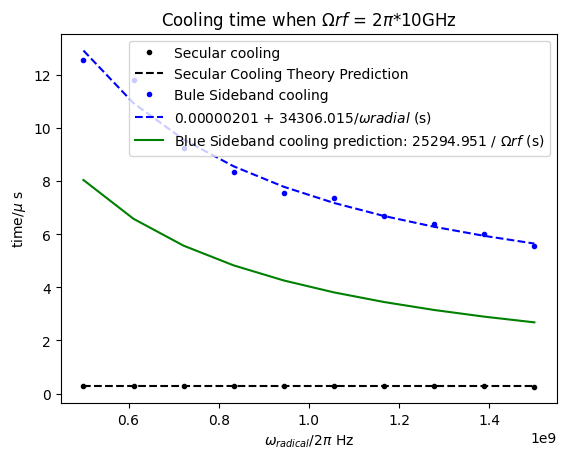

In [18]:
import matplotlib.pylab as plt
import scipy.optimize as fitter

deff = 200e-6 # 200 micron
m = 9.10938297e-31 # 9.10938297e-31 kg 
q = 1.6e-19 # 1.6e-19 C
TotalTime = 5e-6
Rp = 5e6
Q = 2000

wrf = 2 * np.pi * 10e9

xdata = Blue_20_keep_wrf_wrf
ydata = Blue_20_keep_wrf_time

def model(x, a0, a1):
    return a0 + a1 / x

par0 = np.array([0,1]) # initial guess for parameters

par, cov = fitter.curve_fit(model, xdata, ydata, par0)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# it uses least square

Prediction_Blue = np.sqrt(2) *  m * deff ** 2/ q / q/ Rp * wrf / Blue_20_keep_wrf_wrf

plt.plot(Secular_20_keep_wrf_wrf / (2 * np.pi), Secular_20_keep_wrf_time * 1e6, 'k.', label = 'Secular cooling')
plt.plot(Secular_20_keep_wrf_wrf/ (2 * np.pi), m * deff ** 2/ q ** 2/ Rp * np.ones(len(Secular_20_keep_wrf_wrf)) * 1e6, 'k--', label = 'Secular Cooling Theory Prediction')
plt.plot(Blue_20_keep_wrf_wrf / (2 * np.pi), Blue_20_keep_wrf_time* 1e6, 'b.', label = 'Bule Sideband cooling')
plt.plot(Blue_20_keep_wrf_wrf / (2 * np.pi), model(Blue_20_keep_wrf_wrf, *par) * 1e6, 'b--', label = '{:.8f} + {:.3f}/$\omega radial$ (s)'.format(par[0], par[1]))
plt.plot(Blue_20_keep_wrf_wrf / (2 * np.pi), Prediction_Blue * 1e6, 'g-', label = 'Blue Sideband cooling prediction: {:.3f} / $\Omega rf$ (s)'.format(np.sqrt(2) *  m * deff ** 2/ q ** 2/ Rp * wrf))
plt.legend()
plt.ylabel('time/$\mu$ s')
plt.xlabel('$\omega_{radical}$/$2\pi$ Hz')
plt.title('Cooling time when $\Omega rf$ = 2$\pi$*{}GHz'.format(10))
plt.show()

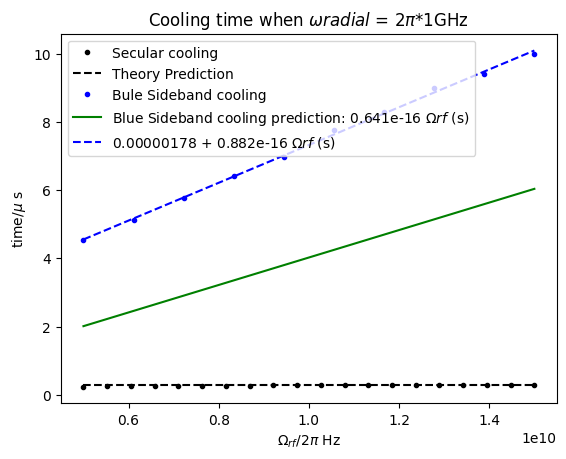

In [17]:
import matplotlib.pylab as plt
deff = 200e-6 # 200 micron
m = 9.10938297e-31 # 9.10938297e-31 kg 
q = 1.6e-19 # 1.6e-19 C
TotalTime = 5e-6
Rp = 5e6
Q = 2000
wradial = 1e9 * 2 * np.pi

xdata = Blue_20_keep_wradial_wradial
ydata = Blue_20_keep_wradial_time

def model(x, a0, a1):
    return a0 + a1 * x

par0 = np.array([0,1]) # initial guess for parameters

par, cov = fitter.curve_fit(model, xdata, ydata, par0)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# it uses least square

Prediction_Blue = np.sqrt(2) *  m * deff ** 2/ q ** 2/ Rp / wradial * Blue_20_keep_wradial_wradial

plt.plot(Secular_10_keep_wradial_wradial / (2 * np.pi), Secular_10_keep_wradial_time * 1e6, 'k.', label = 'Secular cooling')
plt.plot(Secular_10_keep_wradial_wradial / (2 * np.pi), m * deff ** 2/ q ** 2/ Rp * np.ones(len(Secular_10_keep_wradial_wradial)) * 1e6, 'k--', label = 'Theory Prediction')
plt.plot(Blue_20_keep_wradial_wradial / (2 * np.pi), Blue_20_keep_wradial_time * 1e6, 'b.', label = 'Bule Sideband cooling')
plt.plot(Blue_20_keep_wradial_wradial / (2 * np.pi), Prediction_Blue * 1e6, 'g-', label = 'Blue Sideband cooling prediction: {:.3f}e-16 $\Omega rf$ (s)'.format(np.sqrt(2) *  m * deff ** 2/ q ** 2/ Rp / wradial * 1e16))
plt.plot(Blue_20_keep_wradial_wradial/ (2 * np.pi), model(Blue_20_keep_wradial_wradial, *par) * 1e6, 'b--', label = '{:.8f} + {:.3f}e-16 $\Omega rf$ (s)'.format(par[0], par[1] * 1e16))
plt.legend()
plt.ylabel('time/$\mu$ s')
plt.xlabel('$\Omega_{rf}$/$2\pi$ Hz')
plt.title('Cooling time when $\omega radial$ = 2$\pi$*{}GHz'.format(1))
plt.show()

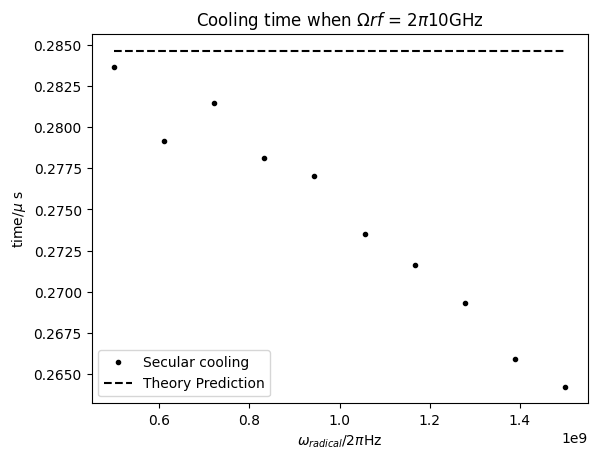

In [19]:
import matplotlib.pylab as plt

deff = 200e-6 # 200 micron
m = 9.10938297e-31 # 9.10938297e-31 kg 
q = 1.6e-19 # 1.6e-19 C
TotalTime = 5e-6
Rp = 5e6
Q = 2000

plt.plot(Secular_20_keep_wrf_wrf / (2 * np.pi), Secular_20_keep_wrf_time * 1e6, 'k.', label = 'Secular cooling')
plt.plot(Secular_20_keep_wrf_wrf / (2 * np.pi), m * deff ** 2/ q ** 2/ Rp * np.ones(len(Secular_20_keep_wrf_wrf)) * 1e6, 'k--', label = 'Theory Prediction')
plt.legend()
plt.ylabel('time/$\mu$ s')
plt.xlabel('$\omega_{radical}$/2$\pi$Hz')
plt.title('Cooling time when $\Omega rf$ = 2$\pi${}GHz'.format(10))
plt.show()


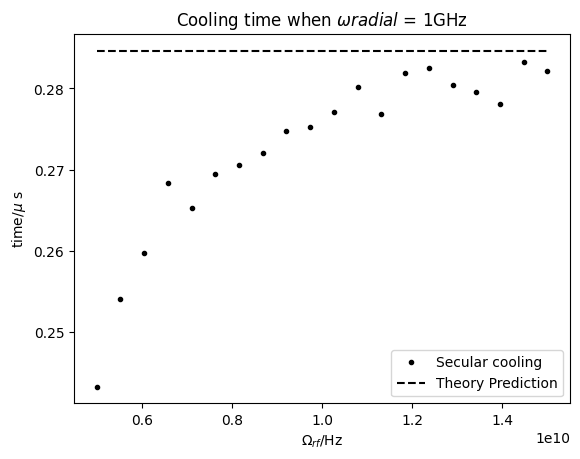

In [20]:
import matplotlib.pylab as plt

deff = 200e-6 # 200 micron
m = 9.10938297e-31 # 9.10938297e-31 kg 
q = 1.6e-19 # 1.6e-19 C
TotalTime = 5e-6
Rp = 5e6
Q = 2000
plt.plot(Secular_10_keep_wradial_wradial / (2 * np.pi), Secular_10_keep_wradial_time * 1e6, 'k.', label = 'Secular cooling')
plt.plot(Secular_10_keep_wradial_wradial / (2 * np.pi), m * deff ** 2/ q ** 2/ Rp * np.ones(len(Secular_10_keep_wradial_wradial)) * 1e6, 'k--', label = 'Theory Prediction')
plt.legend()
plt.ylabel('time/$\mu$ s')
plt.xlabel('$\Omega_{rf}$/Hz')
plt.title('Cooling time when $\omega radial$ = {}GHz'.format(1))
plt.show()
